In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from macrohet import visualise
from tqdm.auto import tqdm
import os
import warnings
from matplotlib.lines import Line2D

warnings.simplefilter(action='ignore', category=FutureWarning)

# Conversion factor
meters_per_pixel = 1.4949402023919043E-07  # Micrometers per pixel
micrometers_per_pixel = meters_per_pixel*1E6 # Micrometers per pixel

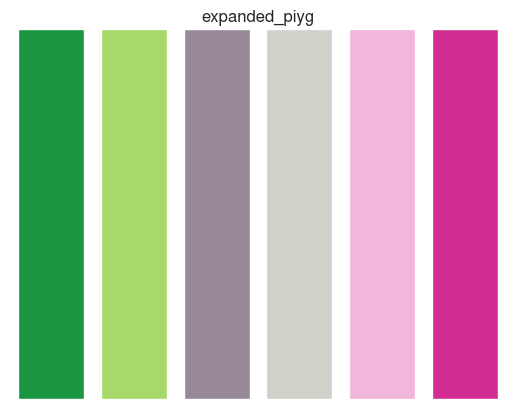

['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']


In [3]:
# set display params
sns.set(style = 'white')
# Set the default font to Helvetica
mpl.rcParams['font.family'] = 'Nimbus Sans'
# import matplotlib as mpl
# mpl.rcdefaults()
# Get the color palette of the PiYG color map
expanded_piyg = visualise.color_palette('expanded_piyg').colors
sns.set_palette(expanded_piyg)
# Display the colors in the PiYG color map
visualise.show_colors('expanded_piyg')
print(expanded_piyg)

In [4]:
output_dir = '/mnt/SYNO/macrohet_syno/results/manuscript/dt_dist'#/mnt/DATA/macrohet/results/preliminary_sc_measures/cumulative_sc_plots/thresholded_480/'#'/Users/dayn/data/macrohet_mac/temp_results/'#
os.makedirs(output_dir, exist_ok = True)

In [5]:
df = pd.read_pickle('/mnt/SYNO/macrohet_syno/results/dfs/dt_df.pkl')
# Assuming your DataFrame is named 'df'
df['Strain/Compound'] = df['Compound']  # Create a new column and copy values from 'Compound'
# Replace values in 'NewColumn' where 'Strain' is 'RD1' with 'RD1'
df.loc[df['Strain'] == 'RD1', 'Strain/Compound'] = 'RD1'
df

,index,Acquisition ID,Biological Replicate,Cell ID,Compound,Concentration,Eccentricity,Experiment ID,Final Infection Status,Frame,...,Unique ID,dMphi Area (µm),dMtb Area (µm),dt,r2,x,y,doubling_times,dmtb_values,Strain/Compound
0,0,"(3, 4)",1,426,CTRL,EC0,0.929721,PS0000,0.0,0.0,...,426.3.4,-92.746118,-0.424621,7.0,0.944356,457.172943,8.791715,"[2.0, 3.0, 4.0, 9.0, 17.0]","[0.15, 0.31, 0.62, 1.23, 2.46]",RD1
1,1,"(3, 4)",1,426,CTRL,EC0,0.977788,PS0000,0.0,1.0,...,426.3.4,-92.746118,-0.424621,7.0,0.944356,459.138947,6.718642,"[2.0, 3.0, 4.0, 9.0, 17.0]","[0.15, 0.31, 0.62, 1.23, 2.46]",RD1
2,2,"(3, 4)",1,426,CTRL,EC0,0.733415,PS0000,0.0,2.0,...,426.3.4,-92.746118,-0.424621,7.0,0.944356,460.555237,10.785886,"[2.0, 3.0, 4.0, 9.0, 17.0]","[0.15, 0.31, 0.62, 1.23, 2.46]",RD1
3,3,"(3, 4)",1,426,CTRL,EC0,0.685354,PS0000,0.0,3.0,...,426.3.4,-92.746118,-0.424621,7.0,0.944356,455.878815,11.143067,"[2.0, 3.0, 4.0, 9.0, 17.0]","[0.15, 0.31, 0.62, 1.23, 2.46]",RD1
4,4,"(3, 4)",1,426,CTRL,EC0,0.727210,PS0000,0.0,4.0,...,426.3.4,-92.746118,-0.424621,7.0,0.944356,462.634186,14.050420,"[2.0, 3.0, 4.0, 9.0, 17.0]","[0.15, 0.31, 0.62, 1.23, 2.46]",RD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315004,1797106,"(6, 12)",3,1874,BDQ,EC99,0.571813,ND0003,1.0,NaN,...,1874.6.12,55.088959,1.095075,NaN,NaN,227.093262,130.358139,[],[],RD1
1315005,1797107,"(6, 12)",3,1874,BDQ,EC99,0.373264,ND0003,1.0,NaN,...,1874.6.12,55.088959,1.095075,NaN,NaN,226.622925,130.532120,[],[],RD1
1315006,1797108,"(6, 12)",3,1874,BDQ,EC99,0.490623,ND0003,1.0,NaN,...,1874.6.12,55.088959,1.095075,NaN,NaN,225.366608,129.932709,[],[],RD1
1315007,1797109,"(6, 12)",3,1874,BDQ,EC99,0.693277,ND0003,1.0,NaN,...,1874.6.12,55.088959,1.095075,NaN,NaN,226.424683,128.489410,[],[],RD1


# Plotting the range of growers

In [6]:
colour_palette = [expanded_piyg[0], expanded_piyg[1], expanded_piyg[-1], expanded_piyg[-2]]

### WT doubling time distribution

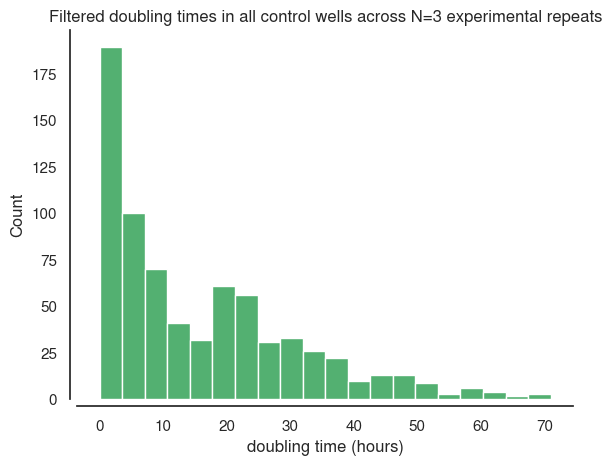

In [9]:
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt']>=0]
subset_df = subset_df[subset_df['r2']>=0.7]
subset_df = subset_df[(subset_df['Compound'] == 'CTRL') & (subset_df['Strain'] == 'WT')]
sns.histplot(subset_df['dt'], bins = 20)

plt.xlabel('doubling time (hours)')
sns.despine(offset = 5)
title = 'Filtered doubling times in all control wells across N=3 experimental repeats'
plt.title(title)
fn = f"{title.replace(' ', '_')}.pdf"
plt.savefig(os.path.join(output_dir, fn), dpi = 314, bbox_inches = 'tight')

### RD1 doubling time distribution

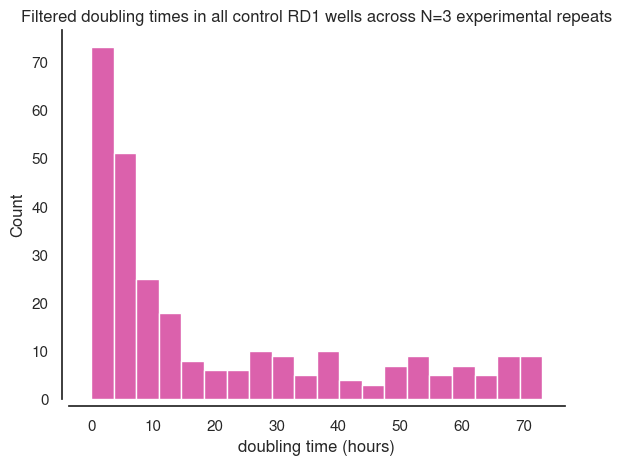

In [10]:
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt']>=0]
subset_df = subset_df[subset_df['r2']>=0.7]
subset_df = subset_df[(subset_df['Compound'] == 'CTRL') & (subset_df['Strain'] == 'RD1')]
sns.histplot(subset_df['dt'], color = expanded_piyg[-1],  bins = 20)

plt.xlabel('doubling time (hours)')
sns.despine(offset = 5)
title = 'Filtered doubling times in all control RD1 wells across N=3 experimental repeats'
plt.title(title)
fn = f"{title.replace(' ', '_')}.pdf"

plt.savefig(os.path.join(output_dir, fn), dpi = 314, bbox_inches = 'tight')

### WT and RD1 doubling time distribution

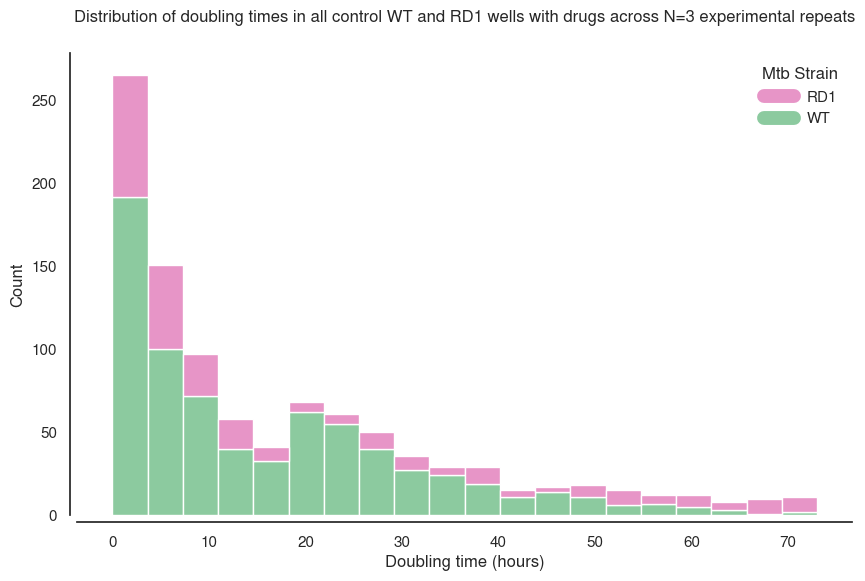

In [12]:
#  First subset for RD1
subset_df_RD1 = df.drop_duplicates(subset=['ID'])
subset_df_RD1 = subset_df_RD1[subset_df_RD1['dt'] >= 0]
subset_df_RD1 = subset_df_RD1[subset_df_RD1['r2'] >= 0.7]
# subset_df_RD1 = subset_df_RD1[subset_df_RD1['Initial Infection Status'] == 1.0]
subset_df_RD1 = subset_df_RD1[(subset_df_RD1['Compound'] == 'CTRL') & (subset_df_RD1['Strain'] == 'RD1')]

# Second subset for WT
subset_df_WT = df.drop_duplicates(subset=['ID'])
subset_df_WT = subset_df_WT[subset_df_WT['dt'] >= 0]
subset_df_WT = subset_df_WT[subset_df_WT['r2'] >= 0.7]
# subset_df_WT = subset_df_WT[subset_df_WT['Initial Infection Status'] == 0]
subset_df_WT = subset_df_WT[(subset_df_WT['Compound'] == 'CTRL') & (subset_df_WT['Strain'] == 'WT')]

# Combine the two subsets for stacking
combined_df = pd.concat([subset_df_RD1.assign(Status='Initially infected'), subset_df_WT.assign(Status='Initially uninfected')])

plt.figure(figsize=(10, 6))

# Plot stacked histogram
sns.histplot(data=combined_df, x='dt', hue='Status', multiple='stack', palette=[expanded_piyg[-1], expanded_piyg[0]], bins=20, alpha=0.5)

plt.xlabel('Doubling time (hours)')
sns.despine(offset=5)
title = 'Distribution of doubling times in all control WT and RD1 wells with drugs across N=3 experimental repeats'
plt.title(title, y = 1.05)

# Create custom legend handles
handles = [
    Line2D([0], [0], color=expanded_piyg[-1], lw=10, label='RD1',alpha = 0.5,),
    Line2D([0], [0], color=expanded_piyg[0], lw=10, label='WT',alpha = 0.5,)
]

plt.legend(handles=handles, title='Mtb Strain', frameon=False)

fn = f"{title.replace(' ', '_')}.pdf"
plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')

plt.show()

# Filtering for initially infected

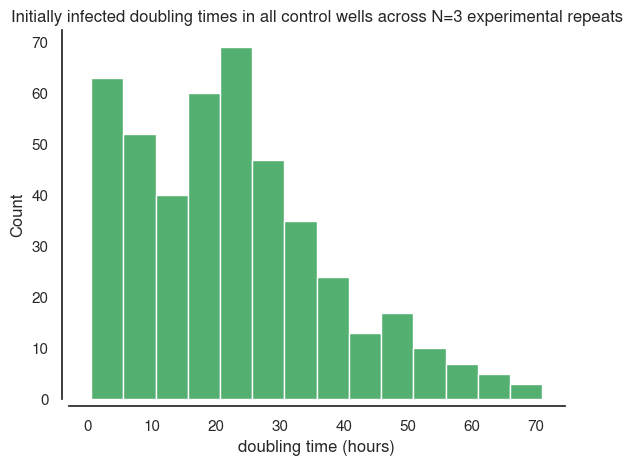

In [63]:
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt']>=0]
subset_df = subset_df[subset_df['r2']>=0.7]
subset_df = subset_df[subset_df['Initial Infection Status']==1.0]
subset_df = subset_df[(subset_df['Compound'] == 'CTRL') & (subset_df['Strain'] == 'WT')]
sns.histplot(subset_df['dt'])

plt.xlabel('doubling time (hours)')
sns.despine(offset = 5)
title = 'Initially infected doubling times in all control wells across N=3 experimental repeats'
plt.title(title)
fn = f"{title.replace(' ', '_')}.png"
plt.savefig(os.path.join(output_dir, fn), dpi = 314, bbox_inches = 'tight')

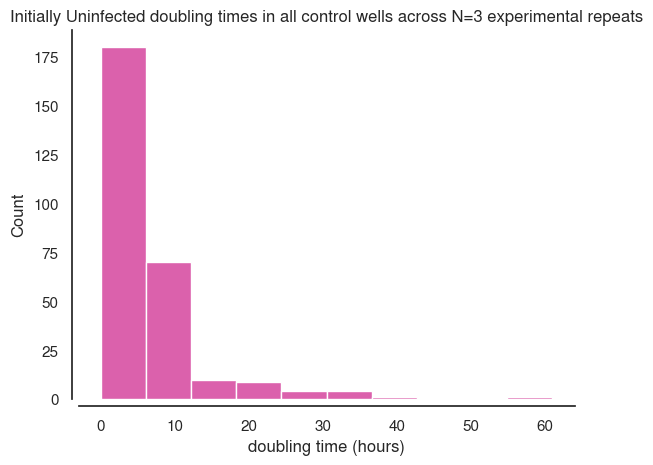

In [97]:
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt']>=0]
subset_df = subset_df[subset_df['r2']>=0.7]
subset_df = subset_df[subset_df['Initial Infection Status']==0]
subset_df = subset_df[(subset_df['Compound'] == 'CTRL') & (subset_df['Strain'] == 'WT')]
sns.histplot(subset_df['dt'], color = expanded_piyg[-1], bins = 10)

plt.xlabel('doubling time (hours)')
sns.despine(offset = 5)
title = 'Initially Uninfected doubling times in all control wells across N=3 experimental repeats'
plt.title(title)
fn = f"{title.replace(' ', '_')}.png"
plt.savefig(os.path.join(output_dir, fn), dpi = 314, bbox_inches = 'tight')

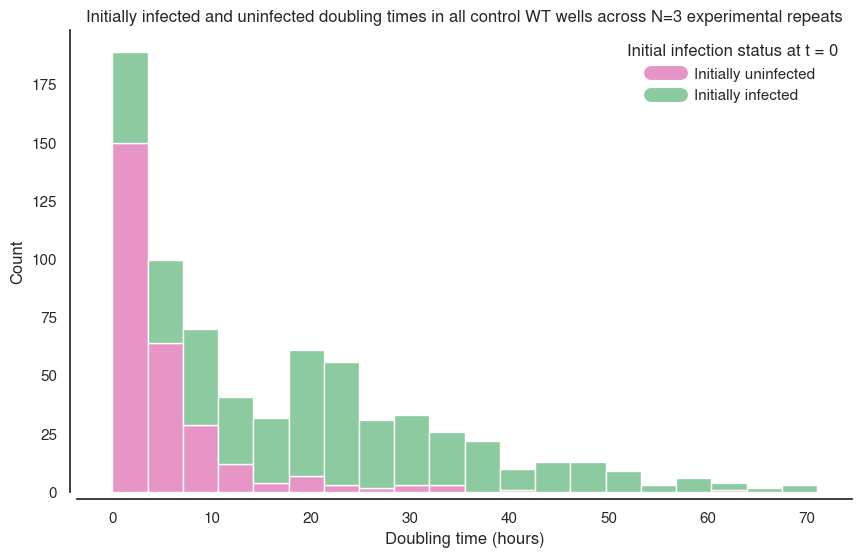

In [7]:
# First subset for initially infected
initially_infected_df = df.drop_duplicates(subset=['ID'])
initially_infected_df = initially_infected_df[initially_infected_df['dt'] >= 0]
initially_infected_df = initially_infected_df[initially_infected_df['r2'] >= 0.7]
initially_infected_df = initially_infected_df[initially_infected_df['Initial Infection Status'] == 1.0]
initially_infected_df = initially_infected_df[(initially_infected_df['Compound'] == 'CTRL') & (initially_infected_df['Strain'] == 'WT')]

# Second subset for initially uninfected
initially_uninfected_df = df.drop_duplicates(subset=['ID'])
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['dt'] >= 0]
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['r2'] >= 0.7]
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Initial Infection Status'] == 0]
initially_uninfected_df = initially_uninfected_df[(initially_uninfected_df['Compound'] == 'CTRL') & (initially_uninfected_df['Strain'] == 'WT')]

# Combine the two subsets for stacking
combined_df = pd.concat([initially_infected_df.assign(Status='Initially infected'), initially_uninfected_df.assign(Status='Initially uninfected')])

plt.figure(figsize=(10, 6))

# Plot stacked histogram
sns.histplot(data=combined_df, x='dt', hue='Status', multiple='stack', palette=[expanded_piyg[0], expanded_piyg[-1]], bins=20, alpha=0.5)

plt.xlabel('Doubling time (hours)')
sns.despine(offset=5)
title = 'Initially infected and uninfected doubling times in all control WT wells across N=3 experimental repeats'
plt.title(title)

# Create custom legend handles
handles = [
    Line2D([0], [0], color=expanded_piyg[-1], lw=10, label='Initially uninfected', alpha=0.5),
    Line2D([0], [0], color=expanded_piyg[0], lw=10, label='Initially infected', alpha=0.5)
]

plt.legend(handles=handles, title='Initial infection status at t = 0', frameon=False)

fn = f"{title.replace(' ', '_')}.pdf"
plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')

plt.show()

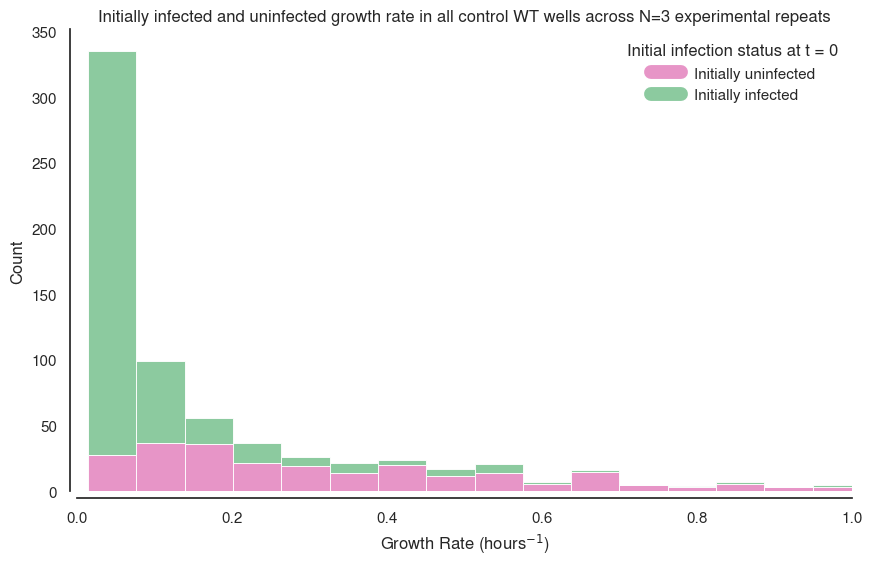

In [11]:

# First subset for initially infected
initially_infected_df = df.drop_duplicates(subset=['ID'])
initially_infected_df = initially_infected_df[initially_infected_df['dt'] >= 0]
initially_infected_df = initially_infected_df[initially_infected_df['r2'] >= 0.7]
initially_infected_df = initially_infected_df[initially_infected_df['Initial Infection Status'] == 1.0]
initially_infected_df = initially_infected_df[(initially_infected_df['Compound'] == 'CTRL') & (initially_infected_df['Strain'] == 'WT')]

# Second subset for initially uninfected
initially_uninfected_df = df.drop_duplicates(subset=['ID'])
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['dt'] >= 0]
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['r2'] >= 0.7]
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Initial Infection Status'] == 0]
initially_uninfected_df = initially_uninfected_df[(initially_uninfected_df['Compound'] == 'CTRL') & (initially_uninfected_df['Strain'] == 'WT')]

# Combine the two subsets for stacking
combined_df = pd.concat([initially_infected_df.assign(Status='Initially infected'), initially_uninfected_df.assign(Status='Initially uninfected')])

# Calculate the reciprocal of the doubling time
combined_df['Growth Rate (hours^-1)'] = 1 / combined_df['dt']

plt.figure(figsize=(10, 6))

# Plot stacked histogram
sns.histplot(data=combined_df, x='Growth Rate (hours^-1)', hue='Status', multiple='stack', palette=[expanded_piyg[0], expanded_piyg[-1]], bins=80, alpha=0.5)

plt.xlabel('Growth Rate (hours$^{-1}$)')
sns.despine(offset=5)
title = 'Initially infected and uninfected growth rate in all control WT wells across N=3 experimental repeats'
plt.title(title)

# Create custom legend handles
handles = [
    Line2D([0], [0], color=expanded_piyg[-1], lw=10, label='Initially uninfected', alpha=0.5),
    Line2D([0], [0], color=expanded_piyg[0], lw=10, label='Initially infected', alpha=0.5)
]

plt.legend(handles=handles, title='Initial infection status at t = 0', frameon=False)
plt.xlim(0,1)
fn = f"{title.replace(' ', '_')}.pdf"
plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')

plt.show()

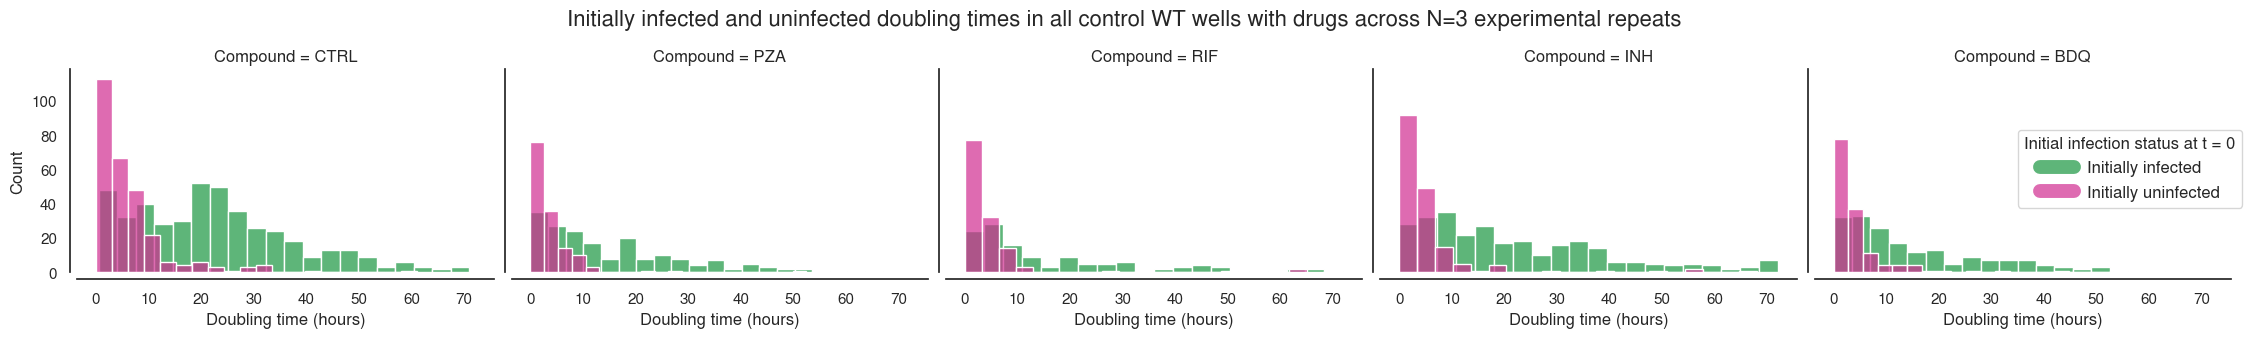

In [105]:
# Filter the main DataFrame for initially infected
initially_infected_df = df.drop_duplicates(subset=['ID'])
initially_infected_df = initially_infected_df[initially_infected_df['dt'] >= 0]
initially_infected_df = initially_infected_df[initially_infected_df['r2'] >= 0.7]
initially_infected_df = initially_infected_df[initially_infected_df['Initial Infection Status'] == 1.0]
initially_infected_df = initially_infected_df[initially_infected_df['Compound'].isin(['CTRL', 'PZA', 'RIF', 'INH', 'BDQ']) & (initially_infected_df['Strain'] == 'WT')]

# Filter the secondary DataFrame for initially uninfected
initially_uninfected_df = df.drop_duplicates(subset=['ID'])
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['dt'] >= 0]
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['r2'] >= 0.7]
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Initial Infection Status'] == 0]
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Compound'].isin(['CTRL', 'PZA', 'RIF', 'INH', 'BDQ']) & (initially_uninfected_df['Strain'] == 'WT')]

# Combine the two subsets for stacking
combined_df = pd.concat([initially_infected_df.assign(Status='Initially infected'), initially_uninfected_df.assign(Status='Initially uninfected')])

# Initialize the FacetGrid object
g = sns.FacetGrid(combined_df, col='Compound', height=3, aspect=1.5, hue='Status', palette=[expanded_piyg[0], expanded_piyg[-1]])

# Plot stacked histograms
g.map(sns.histplot, 'dt', multiple='stack', bins=20, alpha=0.7)

for ax in g.axes.flat:
    ax.set_xlabel('Doubling time (hours)')

sns.despine(offset=5)
g.fig.subplots_adjust(top=0.9)

title = 'Initially infected and uninfected doubling times in all control WT wells with drugs across N=3 experimental repeats'
g.fig.suptitle(title, fontsize=16, y=1.1)

# Add a single legend
handles = [
    Line2D([0], [0], color=expanded_piyg[0], lw=10, label='Initially infected', alpha=0.7),
    Line2D([0], [0], color=expanded_piyg[-1], lw=10, label='Initially uninfected', alpha=0.7)
]

g.fig.legend(handles=handles, loc='center right', fontsize=12, title='Initial infection status at t = 0')

fn = f"{title.replace(' ', '_')}.png"
plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')

plt.show()

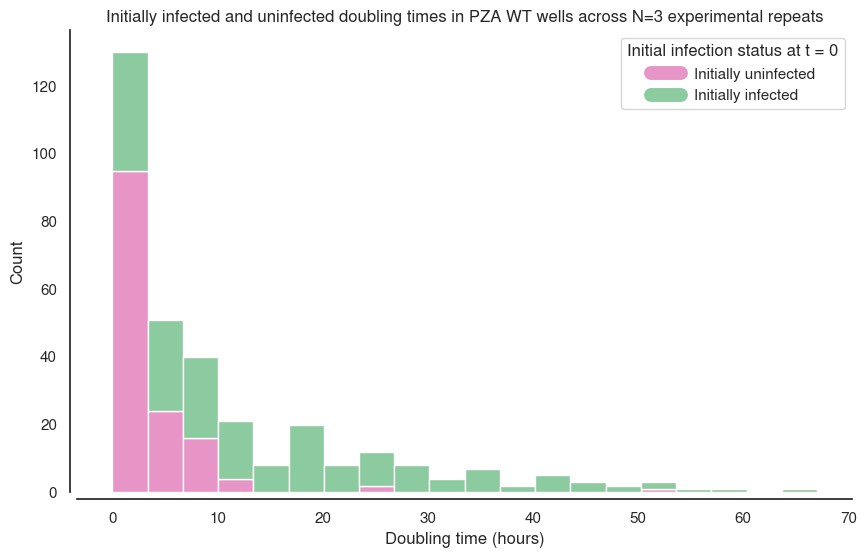

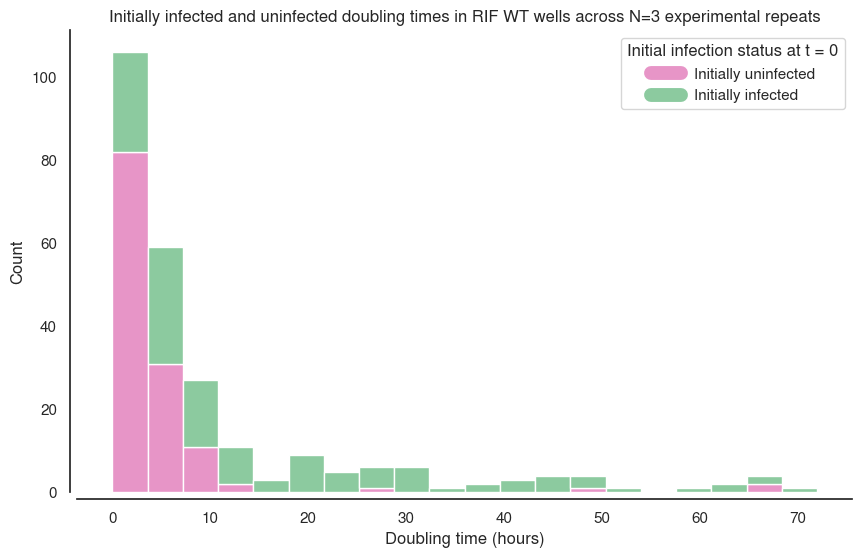

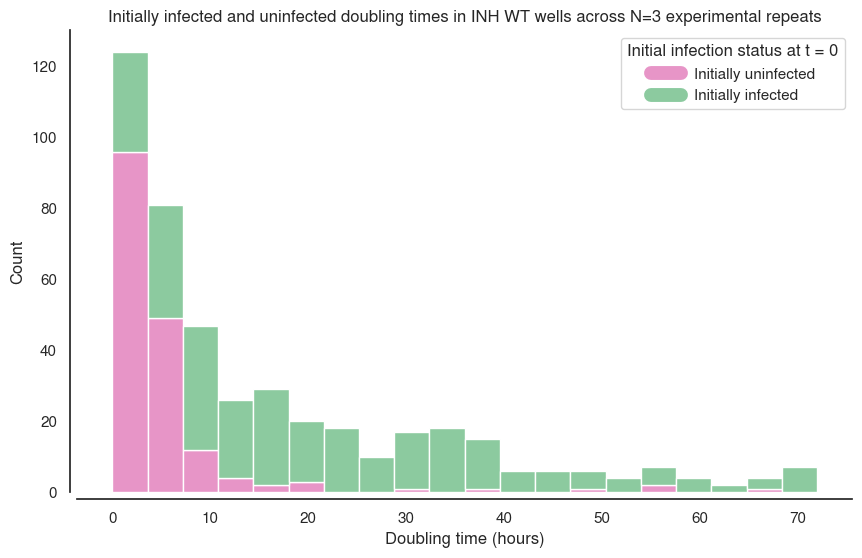

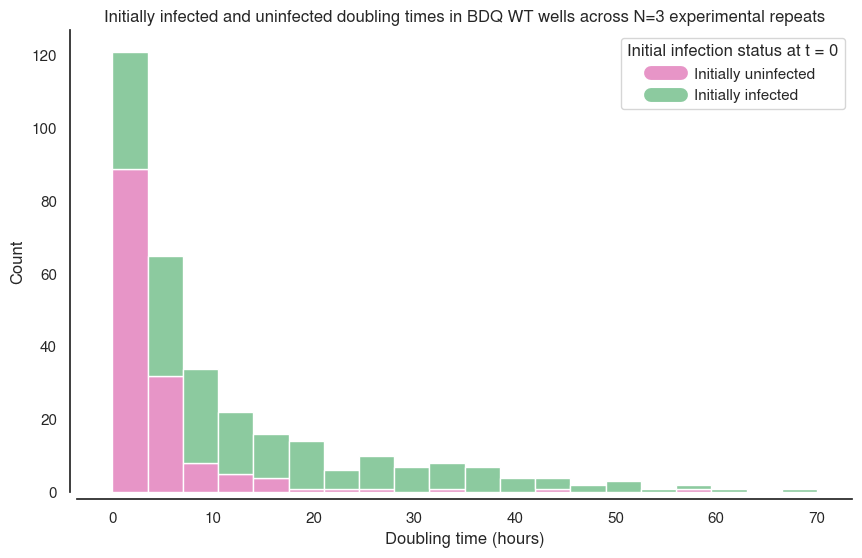

In [106]:
for compound in ['PZA', 'RIF', 'INH', 'BDQ']:

    # First subset for initially infected
    initially_infected_df = df.drop_duplicates(subset=['ID'])
    initially_infected_df = initially_infected_df[initially_infected_df['dt'] >= 0]
    initially_infected_df = initially_infected_df[initially_infected_df['r2'] >= 0.7]
    initially_infected_df = initially_infected_df[initially_infected_df['Initial Infection Status'] == 1.0]
    initially_infected_df = initially_infected_df[(initially_infected_df['Compound'] == compound) & (initially_infected_df['Strain'] == 'WT')]
    
    # Second subset for initially uninfected
    initially_uninfected_df = df.drop_duplicates(subset=['ID'])
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['dt'] >= 0]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['r2'] >= 0.7]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Initial Infection Status'] == 0]
    initially_uninfected_df = initially_uninfected_df[(initially_uninfected_df['Compound'] == compound) & (initially_uninfected_df['Strain'] == 'WT')]
    
    # Combine the two subsets for stacking
    combined_df = pd.concat([initially_infected_df.assign(Status='Initially infected'), initially_uninfected_df.assign(Status='Initially uninfected')])
    
    plt.figure(figsize=(10, 6))
    
    # Plot stacked histogram
    sns.histplot(data=combined_df, x='dt', hue='Status', multiple='stack', palette=[expanded_piyg[0], expanded_piyg[-1]], bins=20, alpha=0.5)
    
    plt.xlabel('Doubling time (hours)')
    sns.despine(offset=5)
    title = f'Initially infected and uninfected doubling times in {compound} WT wells across N=3 experimental repeats'
    plt.title(title)
    
    # Create custom legend handles
    handles = [
        Line2D([0], [0], color=expanded_piyg[-1], lw=10, label='Initially uninfected', alpha=0.5),
        Line2D([0], [0], color=expanded_piyg[0], lw=10, label='Initially infected', alpha=0.5)
    ]
    
    plt.legend(handles=handles, title='Initial infection status at t = 0')
    
    fn = f"{title.replace(' ', '_')}.png"
    plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')
    
    plt.show()

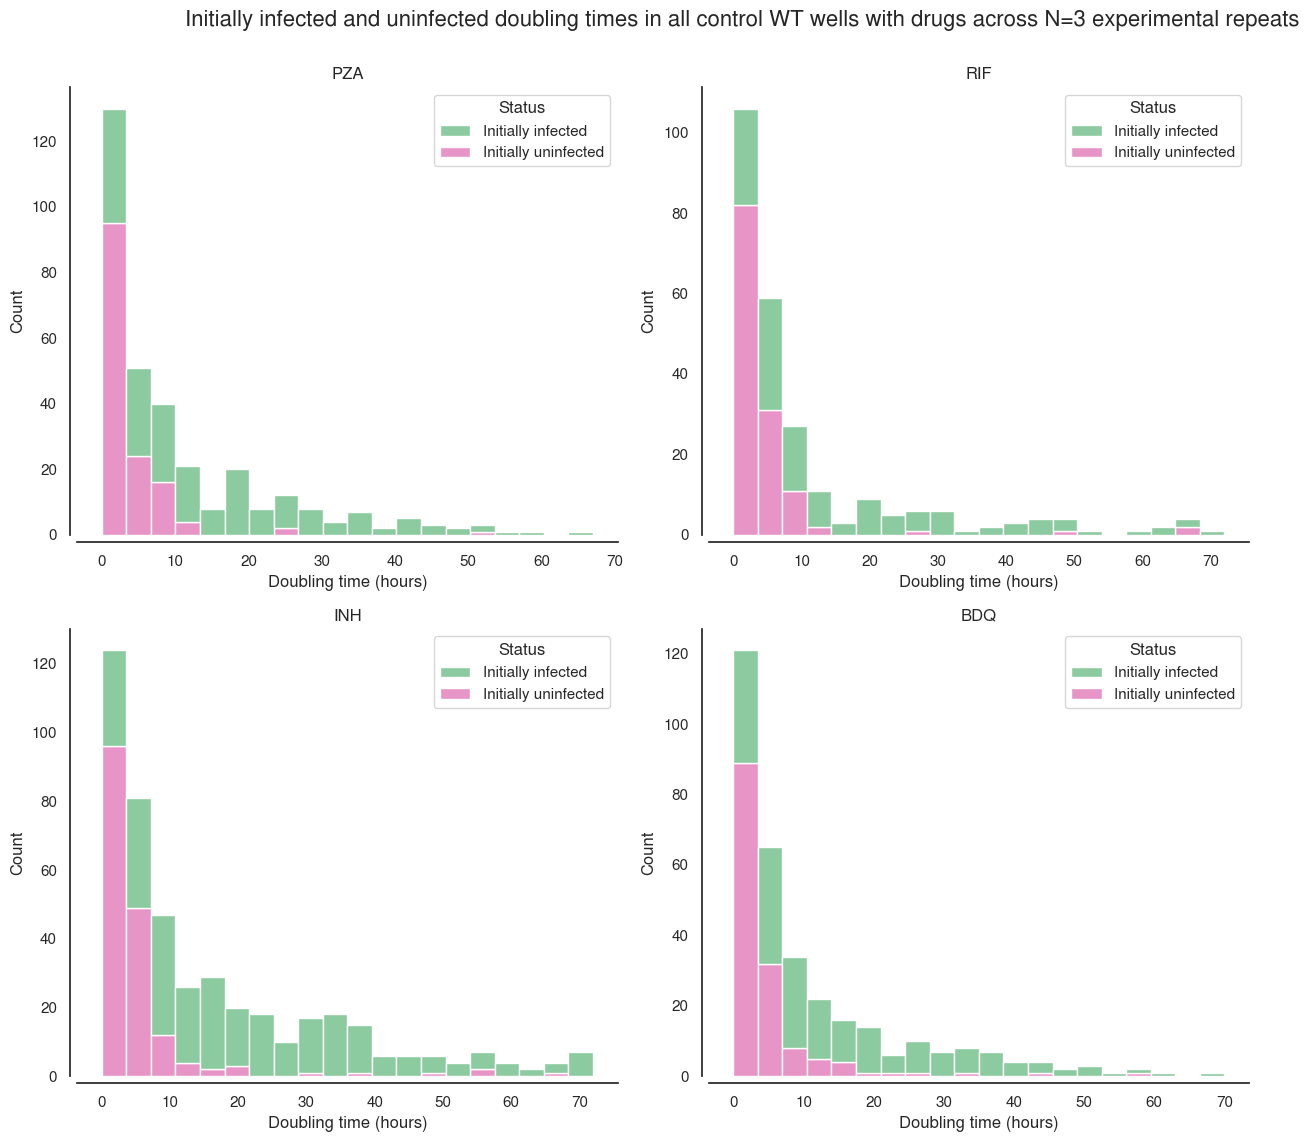

In [108]:
# Initialize the figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, compound in enumerate(['PZA', 'RIF', 'INH', 'BDQ']):
    
    # First subset for initially infected
    initially_infected_df = df.drop_duplicates(subset=['ID'])
    initially_infected_df = initially_infected_df[initially_infected_df['dt'] >= 0]
    initially_infected_df = initially_infected_df[initially_infected_df['r2'] >= 0.7]
    initially_infected_df = initially_infected_df[initially_infected_df['Initial Infection Status'] == 1.0]
    initially_infected_df = initially_infected_df[(initially_infected_df['Compound'] == compound) & (initially_infected_df['Strain'] == 'WT')]
    
    # Second subset for initially uninfected
    initially_uninfected_df = df.drop_duplicates(subset=['ID'])
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['dt'] >= 0]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['r2'] >= 0.7]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Initial Infection Status'] == 0]
    initially_uninfected_df = initially_uninfected_df[(initially_uninfected_df['Compound'] == compound) & (initially_uninfected_df['Strain'] == 'WT')]
    
    # Combine the two subsets for stacking
    combined_df = pd.concat([initially_infected_df.assign(Status='Initially infected'), initially_uninfected_df.assign(Status='Initially uninfected')])
    
    # Plot stacked histogram
    sns.histplot(data=combined_df, x='dt', hue='Status', multiple='stack', palette=[expanded_piyg[0], expanded_piyg[-1]], bins=20, alpha=0.5, ax=axes[i])
    
    axes[i].set_xlabel('Doubling time (hours)')
    axes[i].set_title(f'{compound}')
    sns.despine(ax=axes[i], offset=5)

# Add a single legend for the entire figure
handles = [
    Line2D([0], [0], color=expanded_piyg[-1], lw=10, label='Initially uninfected', alpha=0.5),
    Line2D([0], [0], color=expanded_piyg[0], lw=10, label='Initially infected', alpha=0.5)
]

title = 'Initially infected and uninfected doubling times in all control WT wells with drugs across N=3 experimental repeats'
# Add a main title
fig.suptitle(title, fontsize=16, y=0.95)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 0.95])


fn = f"{title.replace(' ', '_')}.png"
plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')

plt.show()

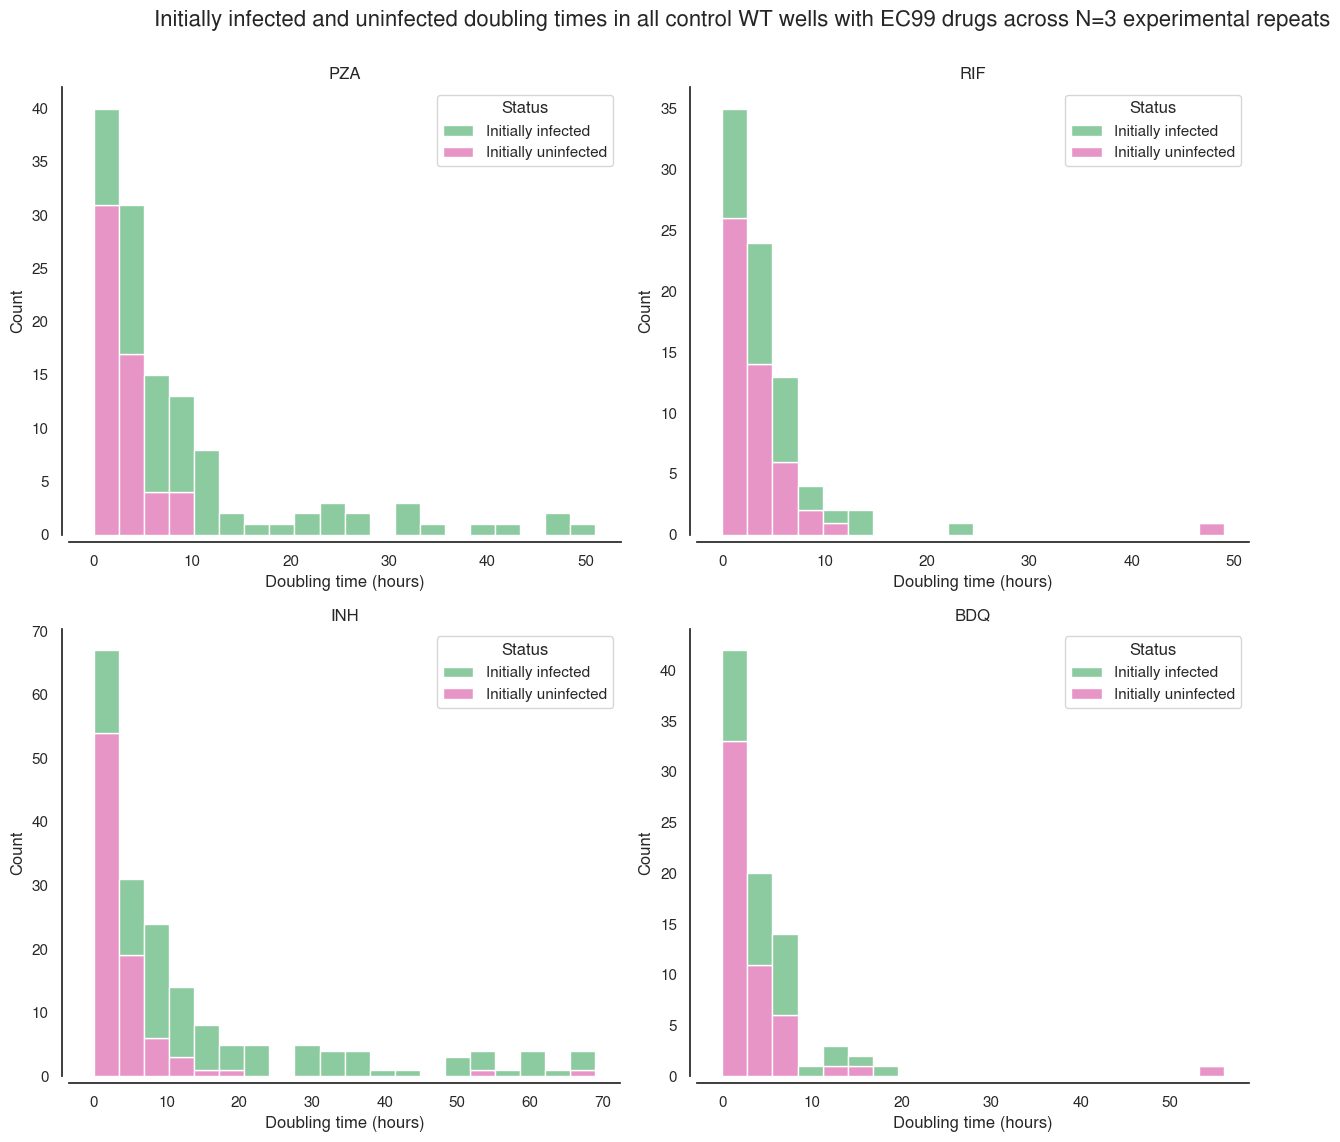

In [118]:
# Initialize the figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, compound in enumerate(['PZA', 'RIF', 'INH', 'BDQ']):
    
    # First subset for initially infected
    initially_infected_df = df.drop_duplicates(subset=['ID'])
    initially_infected_df = initially_infected_df[initially_infected_df['dt'] >= 0]
    initially_infected_df = initially_infected_df[initially_infected_df['r2'] >= 0.7]
    initially_infected_df = initially_infected_df[initially_infected_df['Initial Infection Status'] == 1.0]
    initially_infected_df = initially_infected_df[(initially_infected_df['Compound'] == compound) & (initially_infected_df['Strain'] == 'WT')]
    initially_infected_df = initially_infected_df[(initially_infected_df['Concentration'] == 'EC99')]

    # Second subset for initially uninfected
    initially_uninfected_df = df.drop_duplicates(subset=['ID'])
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['dt'] >= 0]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['r2'] >= 0.7]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Initial Infection Status'] == 0]
    initially_uninfected_df = initially_uninfected_df[(initially_uninfected_df['Compound'] == compound) & (initially_uninfected_df['Strain'] == 'WT')]
    initially_uninfected_df = initially_uninfected_df[(initially_uninfected_df['Concentration'] == 'EC99')]

    # Combine the two subsets for stacking
    combined_df = pd.concat([initially_infected_df.assign(Status='Initially infected'), initially_uninfected_df.assign(Status='Initially uninfected')])
    
    # Plot stacked histogram
    sns.histplot(data=combined_df, x='dt', hue='Status', multiple='stack', palette=[expanded_piyg[0], expanded_piyg[-1]], bins=20, alpha=0.5, ax=axes[i])
    
    axes[i].set_xlabel('Doubling time (hours)')
    axes[i].set_title(f'{compound}')
    sns.despine(ax=axes[i], offset=5)

# Add a single legend for the entire figure
handles = [
    Line2D([0], [0], color=expanded_piyg[-1], lw=10, label='Initially uninfected', alpha=0.5),
    Line2D([0], [0], color=expanded_piyg[0], lw=10, label='Initially infected', alpha=0.5)
]

title = 'Initially infected and uninfected doubling times in all control WT wells with EC99 drugs across N=3 experimental repeats'
# Add a main title
fig.suptitle(title, fontsize=16, y=0.95)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 0.95])


fn = f"{title.replace(' ', '_')}.png"
plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')

plt.show()

### Is dMtb correlated to dt

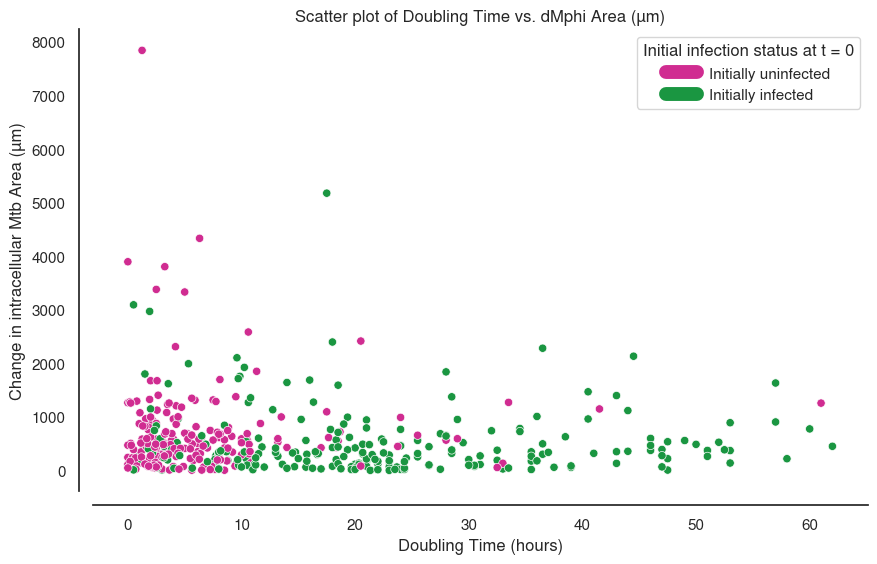

In [149]:
# Ensure the relevant columns are numeric
df['dt'] = pd.to_numeric(df['dt'], errors='coerce')
df['dMphi Area (µm)'] = pd.to_numeric(df['dMphi Area (µm)'], errors='coerce')
df['Initial Infection Status'] = pd.to_numeric(df['Initial Infection Status'], errors='coerce')

# Filter the DataFrame
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt'] >= 0]
subset_df = subset_df[subset_df['dMphi Area (µm)'] >= 0]
subset_df = subset_df[subset_df['r2'] >= 0.7]
subset_df = subset_df[(subset_df['Compound'] == 'CTRL') & (subset_df['Strain'] == 'WT')]

# Plot scatterplot with regression lines
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df, x='dt', y='dMphi Area (µm)', hue='Initial Infection Status', markers=["o", "s"], palette=[expanded_piyg[-1], expanded_piyg[0]])

plt.xlabel('Doubling Time (hours)')
plt.ylabel('Change in intracellular Mtb Area (µm)')
title = 'Scatter plot of Doubling Time vs. dMphi Area (µm)'
plt.title(title)

sns.despine(offset = 10)

# Create custom legend handles
handles = [
    Line2D([0], [0], color=expanded_piyg[-1], lw=10, label='Initially uninfected', alpha=1),
    Line2D([0], [0], color=expanded_piyg[0], lw=10, label='Initially infected', alpha=1)
]

plt.legend(handles=handles, title='Initial infection status at t = 0')

# Save the figure
fn = f"{title.replace(' ', '_')}.png"
plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')

plt.show()

<Figure size 1000x600 with 0 Axes>

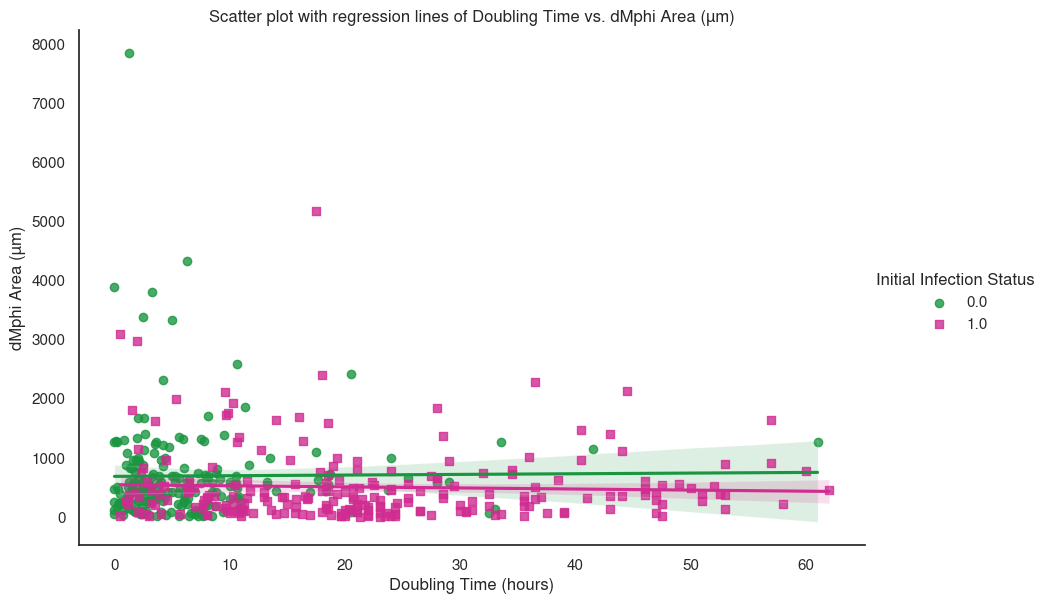

In [129]:
# Ensure the relevant columns are numeric
df['dt'] = pd.to_numeric(df['dt'], errors='coerce')
df['dMphi Area (µm)'] = pd.to_numeric(df['dMphi Area (µm)'], errors='coerce')
df['Initial Infection Status'] = pd.to_numeric(df['Initial Infection Status'], errors='coerce')

# Filter the DataFrame
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt'] >= 0]
subset_df = subset_df[subset_df['dMphi Area (µm)'] >= 0]
subset_df = subset_df[subset_df['r2'] >= 0.7]
subset_df = subset_df[(subset_df['Compound'] == 'CTRL') & (subset_df['Strain'] == 'WT')]

# Plot scatterplot with regression lines
plt.figure(figsize=(10, 6))
sns.lmplot(data=subset_df, x='dt', y='dMphi Area (µm)', hue='Initial Infection Status', height=6, aspect=1.5, markers=["o", "s"], palette=['#1a9641', '#d02c91'])

plt.xlabel('Doubling Time (hours)')
plt.ylabel('dMphi Area (µm)')
plt.title('Scatter plot with regression lines of Doubling Time vs. dMphi Area (µm)')

plt.show()

In [121]:
subset_df

,Time (hours),Mtb Area (µm),dMtb Area (µm),Mphi Area (µm),dMphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,x,y,...,dt_8,dmtb_8,dt_9,dmtb_9,dt_10,dt_11,dmtb_10,dmtb_11,Frame,Strain/Compound
0,0.0,0.424621,-0.424621,459.082108,-92.746118,1.0,1.0,0.0,457.172943,8.791715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RD1
74,0.0,0.000000,0.000000,449.159391,385.712107,0.0,0.0,0.0,663.630920,10.924337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RD1
149,0.0,4.022723,-4.022723,663.369400,-432.196908,1.0,1.0,0.0,725.798340,20.058319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RD1
224,0.0,0.000000,0.000000,670.006893,1373.268298,0.0,0.0,0.0,89.238220,86.176323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RD1
299,0.0,7.039766,16.470817,566.667603,2859.038755,1.0,1.0,1.0,331.759827,89.224770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721756,35.5,31.019665,-21.208691,1749.437612,-760.473468,1.0,1.0,1.0,410.022491,176.790192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,RD1
1721830,36.0,0.000000,0.000000,514.930915,-100.702170,0.0,0.0,0.0,1024.000488,713.742676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,RD1
1721912,37.0,0.916287,6.011736,434.342361,2153.251974,1.0,1.0,1.0,515.027954,1185.665161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,RD1
1721991,37.5,0.000000,0.000000,722.637522,688.533768,0.0,0.0,0.0,1181.615967,819.489746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,RD1


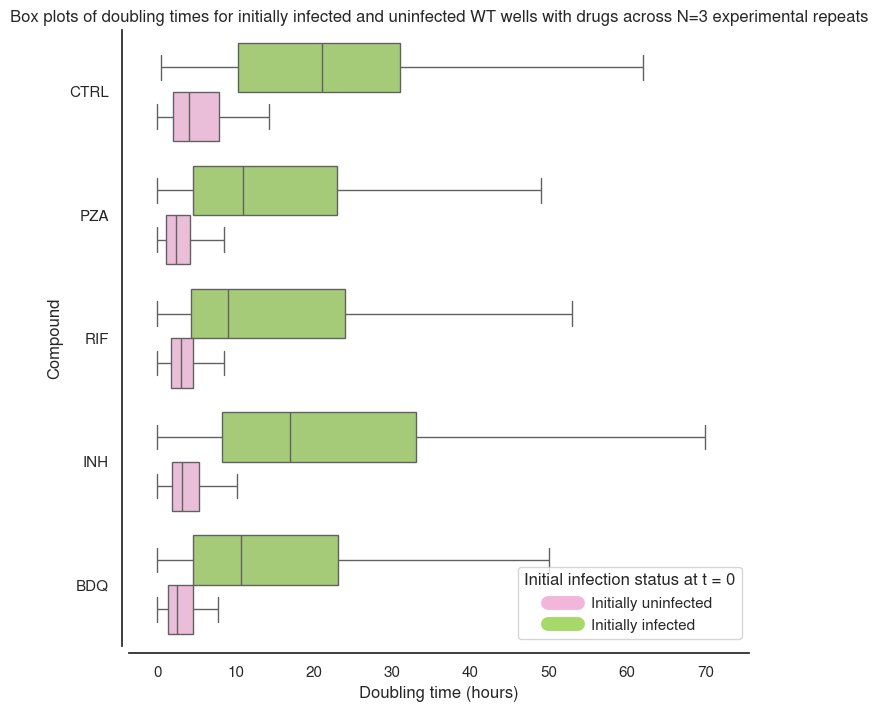

In [136]:
# Combine the data for all compounds
combined_df_list = []

for compound in ['CTRL', 'PZA', 'RIF', 'INH', 'BDQ']:
    
    # First subset for initially infected
    initially_infected_df = df.drop_duplicates(subset=['ID'])
    initially_infected_df = initially_infected_df[initially_infected_df['dt'] >= 0]
    initially_infected_df = initially_infected_df[initially_infected_df['r2'] >= 0.7]
    initially_infected_df = initially_infected_df[initially_infected_df['Initial Infection Status'] == 1.0]
    initially_infected_df = initially_infected_df[(initially_infected_df['Compound'] == compound) & (initially_infected_df['Strain'] == 'WT')]
    
    # Second subset for initially uninfected
    initially_uninfected_df = df.drop_duplicates(subset=['ID'])
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['dt'] >= 0]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['r2'] >= 0.7]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Initial Infection Status'] == 0]
    initially_uninfected_df = initially_uninfected_df[(initially_uninfected_df['Compound'] == compound) & (initially_uninfected_df['Strain'] == 'WT')]
    
    # Combine the two subsets and add to list
    combined_df = pd.concat([initially_infected_df.assign(Status='Initially infected'), initially_uninfected_df.assign(Status='Initially uninfected')])
    combined_df['Compound'] = compound
    combined_df_list.append(combined_df)

# Combine all dataframes
combined_df = pd.concat(combined_df_list)

# Plot the combined box plot
plt.figure(figsize=(8, 8))
ax = sns.boxplot(data=combined_df, y='Compound', x='dt', hue='Status', palette=[expanded_piyg[1], expanded_piyg[-2]], dodge=True, fliersize=0,)

# Set the alpha for the box plots
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

plt.ylabel('Compound')
plt.xlabel('Doubling time (hours)')
title = 'Box plots of doubling times for initially infected and uninfected WT wells with drugs across N=3 experimental repeats'
plt.title(title)
sns.despine(offset=5)

# Create custom legend handles
handles = [
    Line2D([0], [0], color=expanded_piyg[-2], lw=10, label='Initially uninfected', alpha=1),
    Line2D([0], [0], color=expanded_piyg[1], lw=10, label='Initially infected', alpha=1)
]

plt.legend(handles=handles, title='Initial infection status at t = 0')

# Save the figure
fn = f"{title.replace(' ', '_')}.png"
plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')

# Show the plot
plt.show()

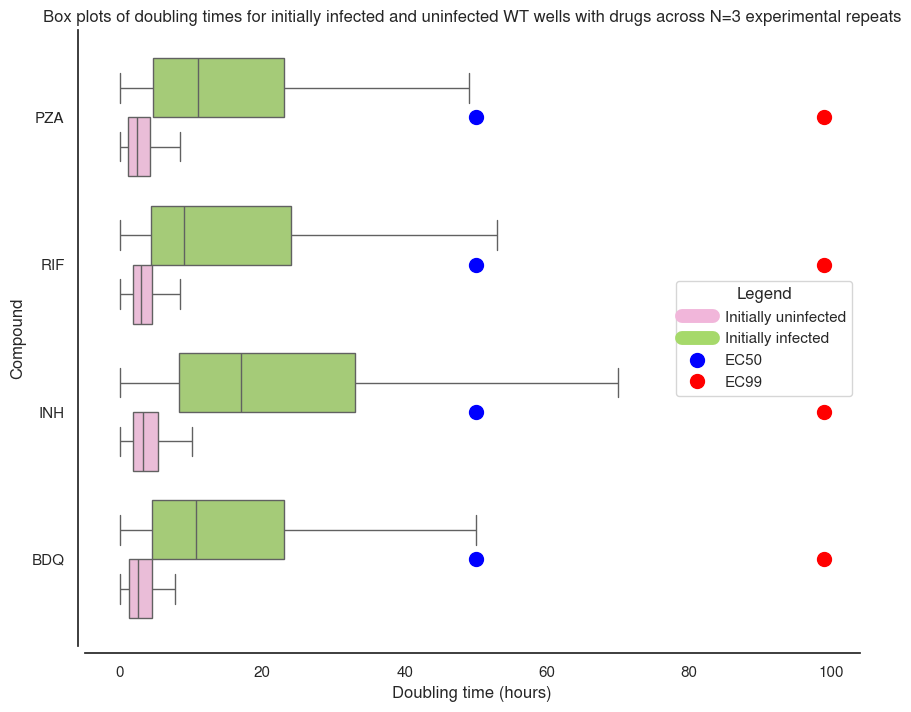

In [137]:
# Combine the data for all compounds
combined_df_list = []

for compound in ['PZA', 'RIF', 'INH', 'BDQ']:
    
    # First subset for initially infected
    initially_infected_df = df.drop_duplicates(subset=['ID'])
    initially_infected_df = initially_infected_df[initially_infected_df['dt'] >= 0]
    initially_infected_df = initially_infected_df[initially_infected_df['r2'] >= 0.7]
    initially_infected_df = initially_infected_df[initially_infected_df['Initial Infection Status'] == 1.0]
    initially_infected_df = initially_infected_df[(initially_infected_df['Compound'] == compound) & (initially_infected_df['Strain'] == 'WT')]
    
    # Second subset for initially uninfected
    initially_uninfected_df = df.drop_duplicates(subset=['ID'])
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['dt'] >= 0]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['r2'] >= 0.7]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Initial Infection Status'] == 0]
    initially_uninfected_df = initially_uninfected_df[(initially_uninfected_df['Compound'] == compound) & (initially_uninfected_df['Strain'] == 'WT')]
    
    # Combine the two subsets and add to list
    combined_df = pd.concat([initially_infected_df.assign(Status='Initially infected'), initially_uninfected_df.assign(Status='Initially uninfected')])
    combined_df['Compound'] = compound
    combined_df_list.append(combined_df)

# Combine all dataframes
combined_df = pd.concat(combined_df_list)

# Create a new DataFrame for EC50 and EC99
ec_values = pd.DataFrame({
    'EC': ['EC50', 'EC50', 'EC50', 'EC50', 'EC99', 'EC99', 'EC99', 'EC99'],
    'Value': [50, 50, 50, 50, 99, 99, 99, 99],
    'Compound': ['PZA', 'RIF', 'INH', 'BDQ', 'PZA', 'RIF', 'INH', 'BDQ'],
    'Status': ['EC50', 'EC50', 'EC50', 'EC50', 'EC99', 'EC99', 'EC99', 'EC99']
})

# Plot the combined box plot
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=combined_df, y='Compound', x='dt', hue='Status', palette=[expanded_piyg[1], expanded_piyg[-2]], dodge=True, fliersize=0)

# Set the alpha for the box plots
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

# Plot EC50 and EC99
for i, compound in enumerate(['PZA', 'RIF', 'INH', 'BDQ']):
    plt.plot([50], [i], 'o', label='EC50', markersize=10, color='blue')
    plt.plot([99], [i], 'o', label='EC99', markersize=10, color='red')

plt.ylabel('Compound')
plt.xlabel('Doubling time (hours)')
title = 'Box plots of doubling times for initially infected and uninfected WT wells with drugs across N=3 experimental repeats'
plt.title(title)
sns.despine(offset=5)

# Create custom legend handles
handles = [
    Line2D([0], [0], color=expanded_piyg[-2], lw=10, label='Initially uninfected', alpha=1),
    Line2D([0], [0], color=expanded_piyg[1], lw=10, label='Initially infected', alpha=1),
    Line2D([0], [0], marker='o', color='blue', lw=0, markersize=10, label='EC50'),
    Line2D([0], [0], marker='o', color='red', lw=0, markersize=10, label='EC99')
]

plt.legend(handles=handles, title='Legend')

# Save the figure
fn = f"{title.replace(' ', '_')}.png"
# plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')

# Show the plot
plt.show()

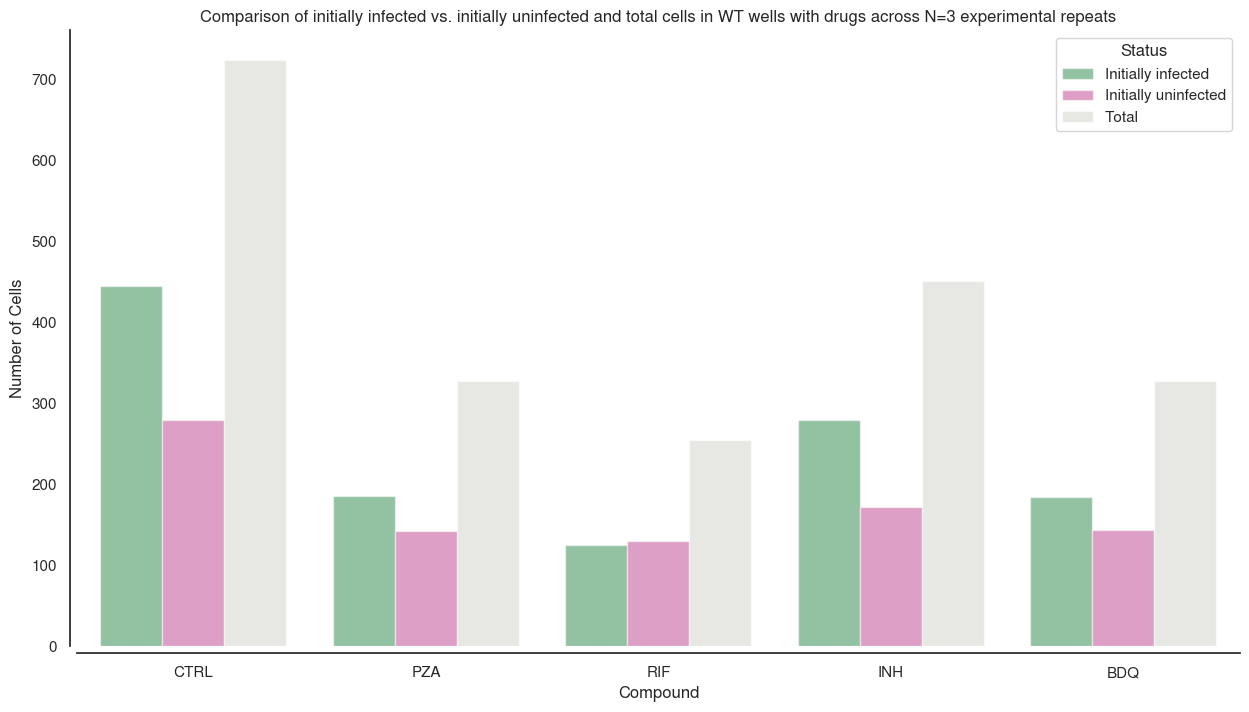

In [117]:
# Combine the data for all compounds
data = {
    'Compound': [],
    'Status': [],
    'Count': []
}

for compound in ['CTRL', 'PZA', 'RIF', 'INH', 'BDQ']:
    
    # First subset for initially infected
    initially_infected_df = df.drop_duplicates(subset=['ID'])
    initially_infected_df = initially_infected_df[initially_infected_df['dt'] >= 0]
    initially_infected_df = initially_infected_df[initially_infected_df['r2'] >= 0.7]
    initially_infected_df = initially_infected_df[initially_infected_df['Initial Infection Status'] == 1.0]
    initially_infected_df = initially_infected_df[(initially_infected_df['Compound'] == compound) & (initially_infected_df['Strain'] == 'WT')]
    infected_count = len(initially_infected_df)
    
    # Second subset for initially uninfected
    initially_uninfected_df = df.drop_duplicates(subset=['ID'])
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['dt'] >= 0]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['r2'] >= 0.7]
    initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Initial Infection Status'] == 0]
    initially_uninfected_df = initially_uninfected_df[(initially_uninfected_df['Compound'] == compound) & (initially_uninfected_df['Strain'] == 'WT')]
    uninfected_count = len(initially_uninfected_df)
    
    total_count = infected_count + uninfected_count

    # Append data
    data['Compound'].append(compound)
    data['Status'].append('Initially infected')
    data['Count'].append(infected_count)
    
    data['Compound'].append(compound)
    data['Status'].append('Initially uninfected')
    data['Count'].append(uninfected_count)
    
    data['Compound'].append(compound)
    data['Status'].append('Total')
    data['Count'].append(total_count)

# Create DataFrame
count_df = pd.DataFrame(data)

# Plot the grouped bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=count_df, x='Compound', y='Count', hue='Status', palette=[expanded_piyg[0], expanded_piyg[-1], '#d1d1ca'], alpha = 0.5)

plt.xlabel('Compound')
plt.ylabel('Number of Cells')
title = 'Comparison of initially infected vs. initially uninfected and total cells in WT wells with drugs across N=3 experimental repeats'
plt.title(title)
sns.despine(offset=5)

# Save the figure
fn = f"{title.replace(' ', '_')}.png"
plt.savefig(os.path.join(output_dir, fn), dpi=314, bbox_inches='tight')

# Show the plot
plt.show()